# This is the opening exploration of Data from the phone system

This data was exported piecemeal from excel and imported to pandas and unified as a dataset.  

In [2]:
import pandas as pd
import glob
import os

# Define the directory path relative to the script location
directory =  "Attachments_call_data"

# Get all CSV files in the directory that match the pattern
csv_files = glob.glob(os.path.join(directory, "csv-queue-report*.csv"))

# List to store individual dataframes
dfs = []

# Read each CSV file
for file in csv_files:
    # Read CSV file
    df = pd.read_csv(file)
    
    # Remove the "Total" row
    df = df[df['Time'] != 'Total']
    
    # Convert Time column to datetime
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Add to list of dataframes
    dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

# Sort by time
combined_df = combined_df.sort_values('Time')

# Remove duplicates if any
combined_df = combined_df.drop_duplicates(subset=['Time'])



  


# Simple Exploration

What do we notice first about the data?

In [3]:
combined_df.head()

,Time,Total Calls,Total Calls [Min. Call Length],Connected Calls,Calls Not Connected,Calls Not Connected (Length Limit Reached),Calls Not Connected (Contact Hung Up),Calls Not Connected (Caller Hangup Within 5 Seconds),Calls Not Connected (Caller Hangup Within 10 Seconds),Calls Not Connected (Caller Hangup Within 20 Seconds),Availability (%),TOTAL CALLS INCLUDING HANGUPS (M),Avg Call Length (s),Longest Wait Time (s),Avg Wait Time (s),Avg Answer Time (s),Avg Wrap Up Time (s),Max. Queue Length,Avg Talk Time (s)
0,2024-12-02 08:00:00,272,272.0,78,194,193,1,0,0,0,28.68,856.0,189.0,1066,161.16,554.21,17.39,20,96.31
1,2024-12-02 08:30:00,248,248.0,33,215,212,3,0,0,0,13.31,895.2,217.0,2193,193.33,1318.63,18.90,20,174.26
2,2024-12-02 09:00:00,107,107.0,22,85,80,5,1,1,2,20.56,870.9,488.0,3818,442.13,2095.96,20.15,20,224.63
3,2024-12-02 09:30:00,43,43.0,13,30,26,4,0,2,2,30.23,657.3,917.0,3926,865.17,2806.11,20.00,20,171.84
4,2024-12-02 10:00:00,75,75.0,12,63,62,1,0,1,1,16.00,320.4,256.0,2477,236.30,1476.34,23.07,20,125.10


In [4]:
combined_df.head(2)

,Time,Total Calls,Total Calls [Min. Call Length],Connected Calls,Calls Not Connected,Calls Not Connected (Length Limit Reached),Calls Not Connected (Contact Hung Up),Calls Not Connected (Caller Hangup Within 5 Seconds),Calls Not Connected (Caller Hangup Within 10 Seconds),Calls Not Connected (Caller Hangup Within 20 Seconds),Availability (%),TOTAL CALLS INCLUDING HANGUPS (M),Avg Call Length (s),Longest Wait Time (s),Avg Wait Time (s),Avg Answer Time (s),Avg Wrap Up Time (s),Max. Queue Length,Avg Talk Time (s)
0,2024-12-02 08:00:00,272,272.0,78,194,193,1,0,0,0,28.68,856.0,189.0,1066,161.16,554.21,17.39,20,96.31
1,2024-12-02 08:30:00,248,248.0,33,215,212,3,0,0,0,13.31,895.2,217.0,2193,193.33,1318.63,18.90,20,174.26


### What are the data structures?

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 125
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Time                                                   567 non-null    datetime64[ns]
 1   Total Calls                                            567 non-null    int64         
 2   Total Calls [Min. Call Length]                         546 non-null    float64       
 3   Connected Calls                                        567 non-null    int64         
 4   Calls Not Connected                                    567 non-null    int64         
 5   Calls Not Connected (Length Limit Reached)             567 non-null    int64         
 6   Calls Not Connected (Contact Hung Up)                  567 non-null    int64         
 7   Calls Not Connected (Caller Hangup Within 5 Seconds)   567 non-null    int64

In [6]:
# Add this cell at the top of your notebook to check the environment
import sys
print(f"Python path: {sys.executable}")

# Try to import and check seaborn version
try:
    import seaborn as sns
    print(f"Seaborn version: {sns.__version__}")
except ImportError:
    print("Seaborn not found")
    !pip install seaborn  # This will install seaborn in the current environment

Python path: /Users/clexp/Sync/HSMA/Primary_Care_Load_Management_Tool/phones/bin/python3.12
Seaborn version: 0.13.2


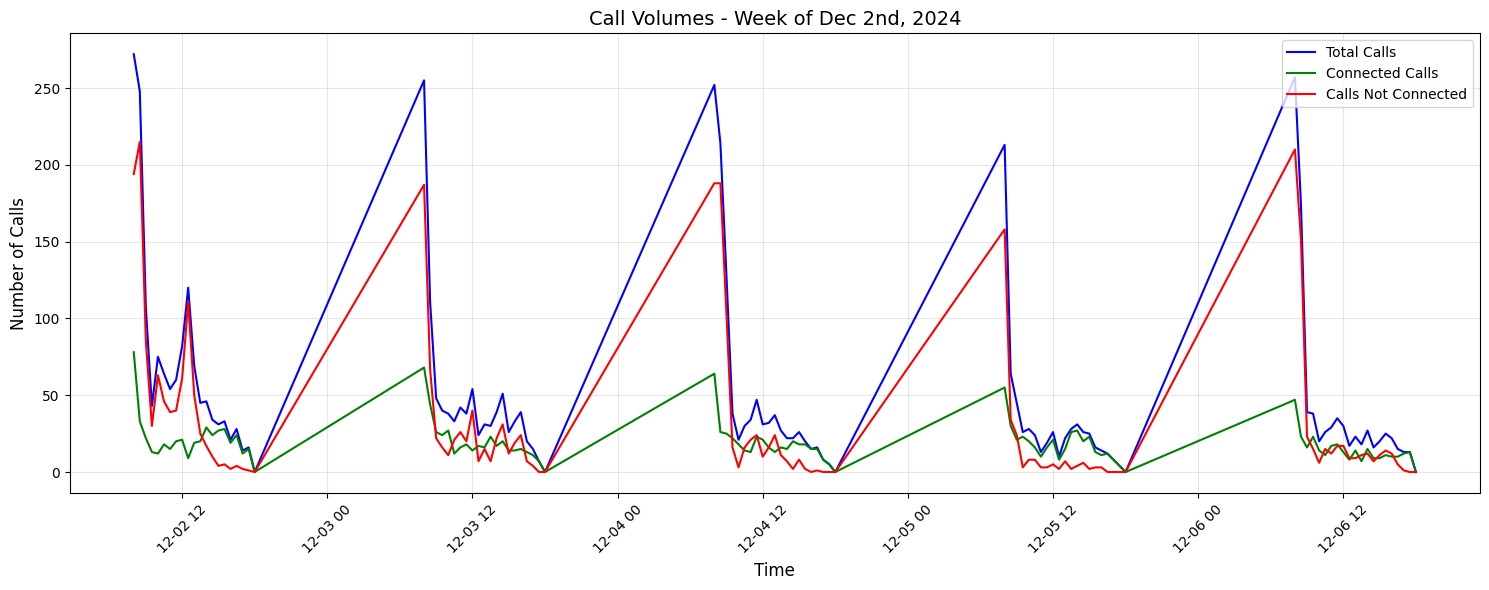

In [7]:
import matplotlib.pyplot as plt



# Filter for one week of data (assuming we want the first week in the dataset)
one_week = combined_df.set_index('Time').loc['2024-12-02':'2024-12-08']

# Create a figure with a larger size
plt.figure(figsize=(15, 6))

# Plot total calls
plt.plot(one_week.index, one_week['Total Calls'], label='Total Calls', color='blue')
plt.plot(one_week.index, one_week['Connected Calls'], label='Connected Calls', color='green')
plt.plot(one_week.index, one_week['Calls Not Connected'], label='Calls Not Connected', color='red')

# Customize the plot
plt.title('Call Volumes - Week of Dec 2nd, 2024', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

## Assessment

This is one months worth of data. Clearly there are four peaks for each week. The majority of the week seem to be at the low levels across the hours of the day the high peaks appear to be probably a Monday morning looking back at the data, this is what we can see most of the time it appears there are 10 to 50 calls an hour but at the start of each week there's a big surge.

#### Where are we going with this?

The role of this data exploration is to see if there's a pattern where we can predict a demand for any given half hour period across the week. This requires extracting comparable half hour slots for each week across the month. This requires calculating the main and standard deviation for the number of half hour calls across the week.

In [9]:
import pandas as pd
import numpy as np

# Create day of week and time columns
combined_df['Day'] = combined_df['Time'].dt.day_name()
combined_df['TimeSlot'] = combined_df['Time'].dt.strftime('%H:%M')

# Function to get stats for a specific day and time slot
def get_timeslot_stats(df, day, time_slot):
    mask = (df['Day'] == day) & (df['TimeSlot'] == time_slot)
    slot_data = df[mask]
    
    stats = {
        'Day': day,
        'TimeSlot': time_slot,
        'Mean_Total_Calls': slot_data['Total Calls'].mean(),
        'StdDev_Total_Calls': slot_data['Total Calls'].std(),
        'Mean_Connected': slot_data['Connected Calls'].mean(),
        'StdDev_Connected': slot_data['Connected Calls'].std(),
        'Count': len(slot_data),  # Number of observations
    }
    return stats

# Get unique days and time slots
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
time_slots = sorted(combined_df['TimeSlot'].unique())

# Calculate stats for each day and time slot
stats_list = []
for day in days:
    for slot in time_slots:
        stats = get_timeslot_stats(combined_df, day, slot)
        stats_list.append(stats)

# Create DataFrame with results
stats_df = pd.DataFrame(stats_list)

# Sort by day and time slot
stats_df = stats_df.sort_values(['Day', 'TimeSlot'])

# Display the first few rows
print("\nStats for Monday morning slots:")
monday_morning = stats_df[stats_df['Day'] == 'Monday'].head()
display(monday_morning)


Stats for Monday morning slots:


,Day,TimeSlot,Mean_Total_Calls,StdDev_Total_Calls,Mean_Connected,StdDev_Connected,Count
0,Monday,08:00,235.2,49.906913,67.0,9.695360,5
1,Monday,08:30,171.6,80.763853,27.6,5.224940,5
2,Monday,09:00,80.8,26.109385,21.4,3.361547,5
3,Monday,09:30,59.6,23.891421,16.0,7.176350,5
4,Monday,10:00,54.4,21.442948,16.6,6.949820,5


In [ ]:
morning_rush = stats_df[stats_df['TimeSlot'] == '08:00']
display(morning_rush)

# Or to look at all Monday slots
monday_slots = stats_df[stats_df['Day'] == 'Monday']
display(monday_slots)

# Create a visualization of the Monday pattern
plt.figure(figsize=(15, 6))
plt.errorbar(monday_slots['TimeSlot'], 
            monday_slots['Mean_Total_Calls'],
            yerr=monday_slots['StdDev_Total_Calls'],
            fmt='o-',
            capsize=5)
plt.title('Monday Call Patterns with Standard Deviation')
plt.xlabel('Time Slot')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

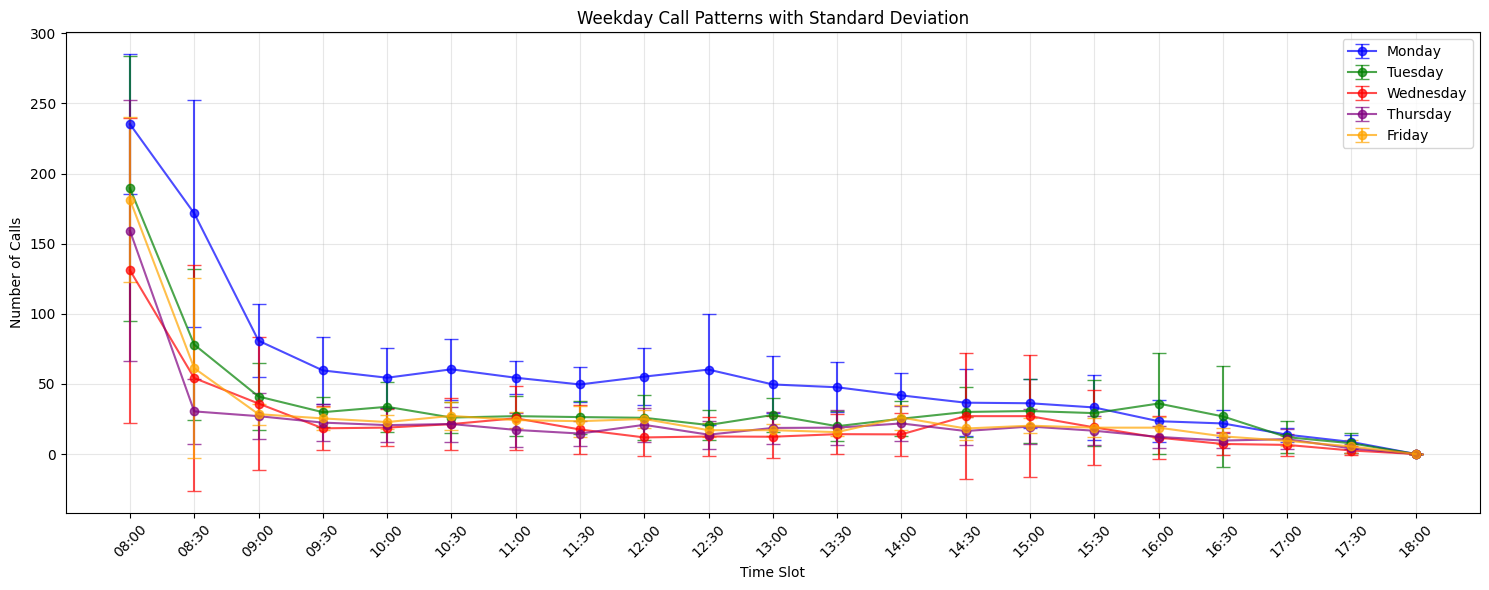

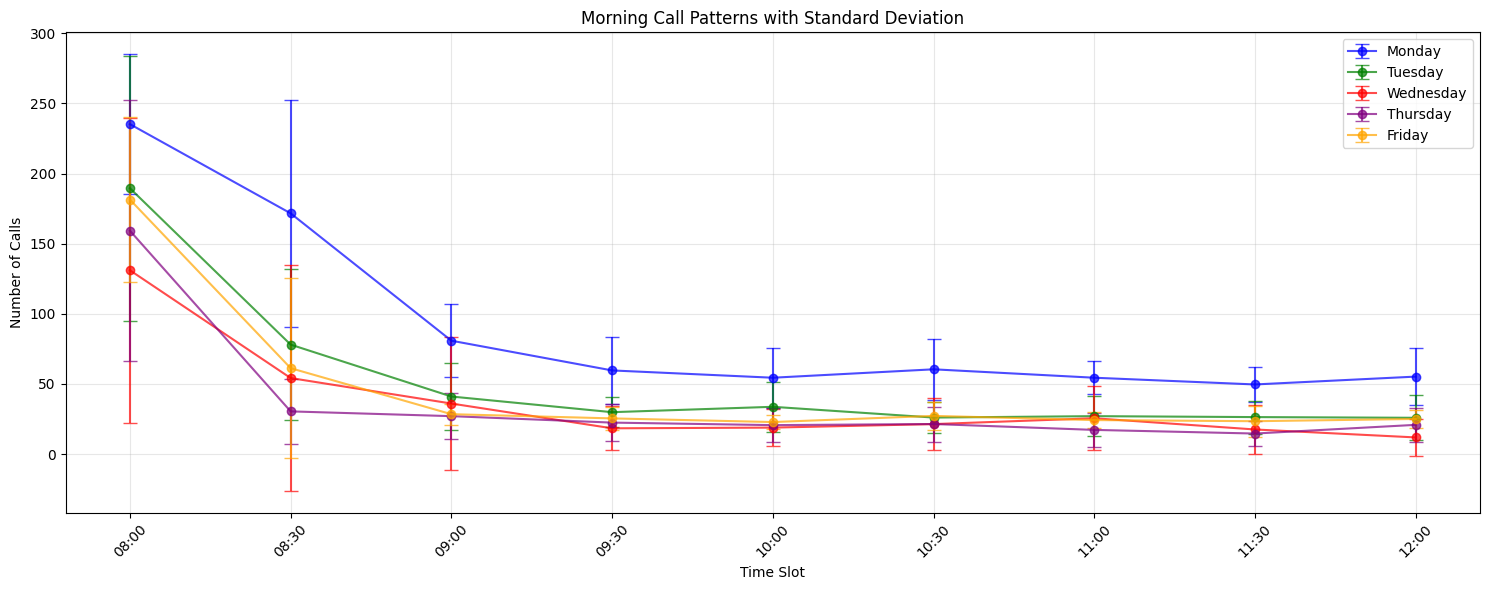

In [13]:
# Create a visualization of all weekdays' patterns
plt.figure(figsize=(15, 6))

# Define colors for each day
colors = {
    'Monday': 'blue',
    'Tuesday': 'green',
    'Wednesday': 'red',
    'Thursday': 'purple',
    'Friday': 'orange'
}

# Plot each day
for day in days:
    day_slots = stats_df[stats_df['Day'] == day]
    plt.errorbar(day_slots['TimeSlot'], 
                day_slots['Mean_Total_Calls'],
                yerr=day_slots['StdDev_Total_Calls'],
                fmt='o-',
                capsize=5,
                label=day,
                color=colors[day],
                alpha=0.7)  # Slight transparency to help see overlaps

plt.title('Weekday Call Patterns with Standard Deviation')
plt.xlabel('Time Slot')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optionally, you might want to see just the morning rush
plt.figure(figsize=(15, 6))
morning_slots = ['08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30', '12:00']

for day in days:
    day_slots = stats_df[
        (stats_df['Day'] == day) & 
        (stats_df['TimeSlot'].isin(morning_slots))
    ]
    plt.errorbar(day_slots['TimeSlot'], 
                day_slots['Mean_Total_Calls'],
                yerr=day_slots['StdDev_Total_Calls'],
                fmt='o-',
                capsize=5,
                label=day,
                color=colors[day],
                alpha=0.7)

plt.title('Morning Call Patterns with Standard Deviation')
plt.xlabel('Time Slot')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
lplt.show()